In [1]:
# Import the dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import data
data=pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## EDA

In [3]:
data.shape

(1460, 81)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# df.count() does not include NaN values
df = data[[column for column in data if data[column].count() / len(data) >= 0.3]]
del df['Id']
print("List of dropped columns:", end=" ")
for c in data.columns:
    if c not in df.columns:
        print(c, end=", ")
        
#we got rid of columns missing more than 30% of data

List of dropped columns: Id, Alley, PoolQC, Fence, MiscFeature, 

In [7]:
#Check if we still have columns with missing data
df.info()
#'FireplaceQu' missing significant data but not affected
#because its an object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [8]:
df=df.drop(['FireplaceQu'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [9]:
df.shape

(1460, 75)

In [10]:
#we will rid of rows with missing data and check if it's a significant lost of data
df1=df.copy() #note: shape of df is (1460,75)

#dropping rows having missing values
df1 = df1.dropna()
df1.shape

#df1 shape (1094,75), that's a significant lost in rows, aproximately 25% of lost data
#we will remain using previous rows and not use df1 data frame

(1094, 75)

In [11]:
#We will focus on sale data to try to predict market price
#but first, lets see what it currently looks like
print(df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [12]:
#we will rid of data that isnt numerical, not important towards house sale calculations
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head() #data with all numerican data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


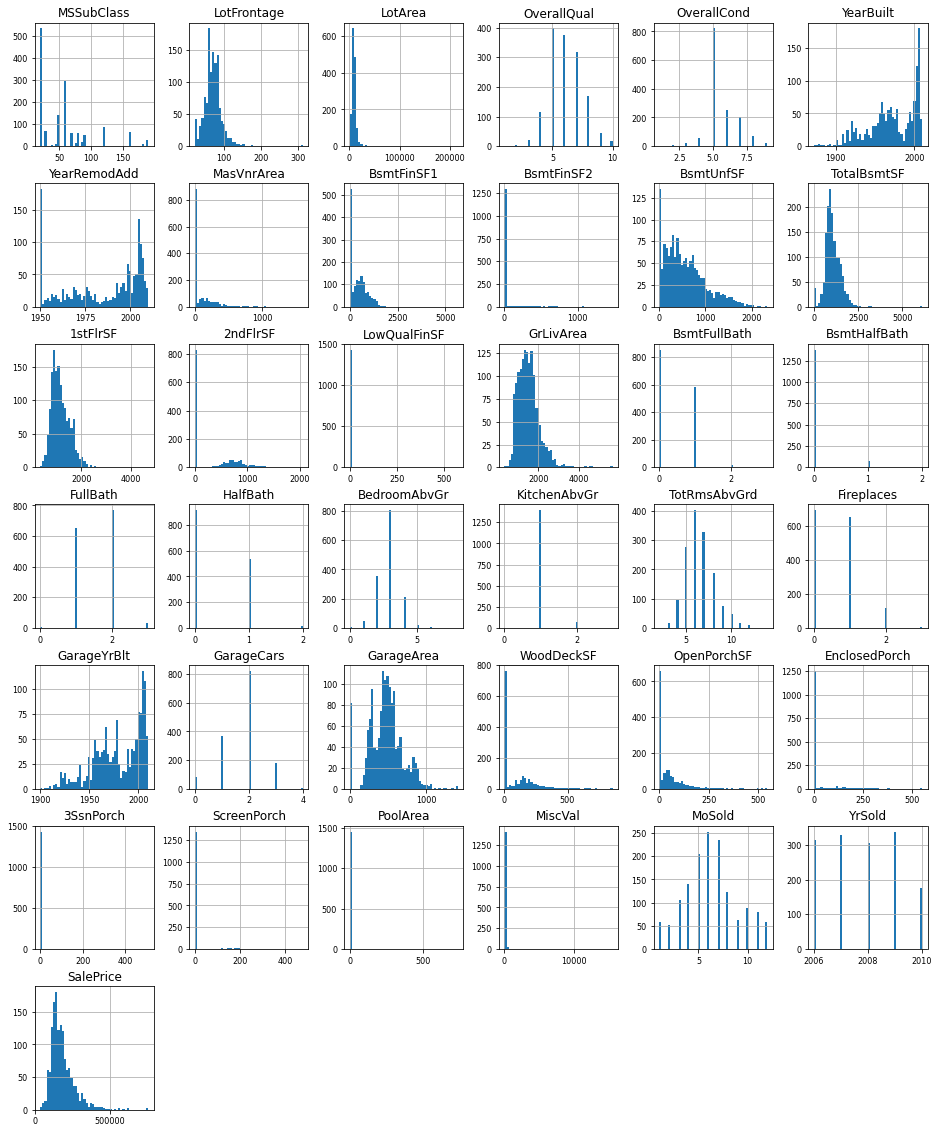

In [13]:
#will check for patterns or clues in distribution curves
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations
#Features such as 1stFlrSF, TotalBsmtSF, LotFrontage, GrLiveArea
#seems to share a similar distribution to the one we have with SalePrice

In [14]:
#correlations that are greather than 0.5 or less than -0.5
df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))
#There are 10 strong correlations with all data including NaN

There is 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


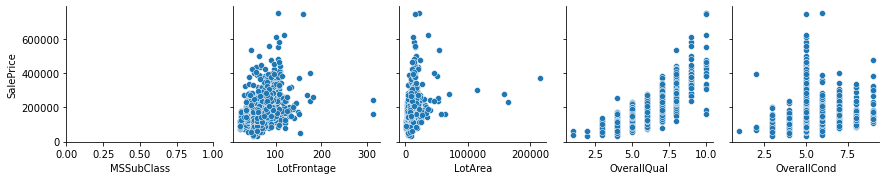

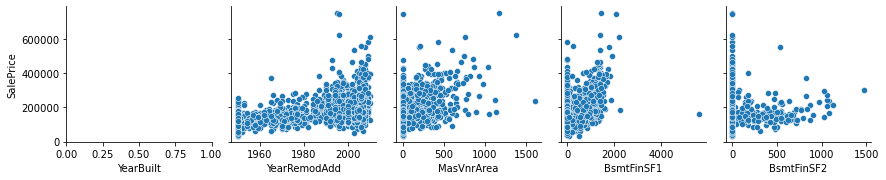

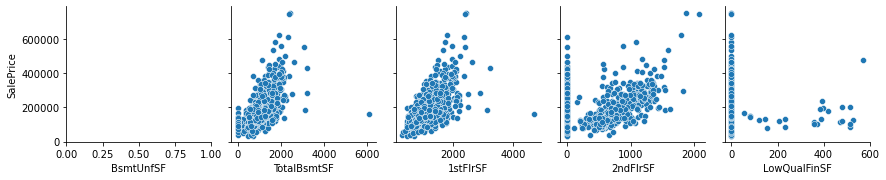

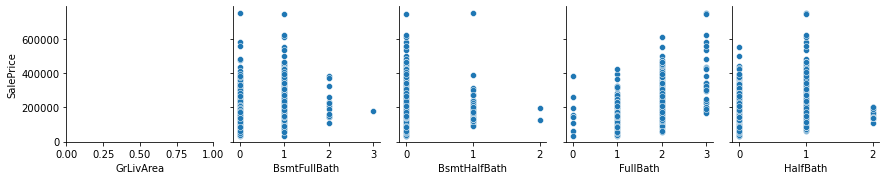

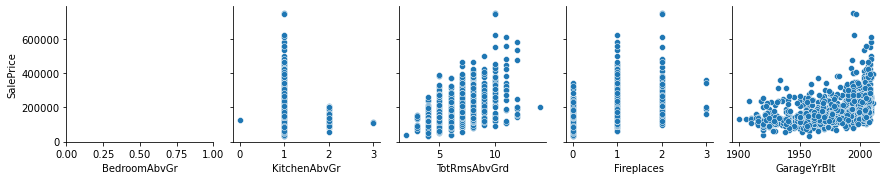

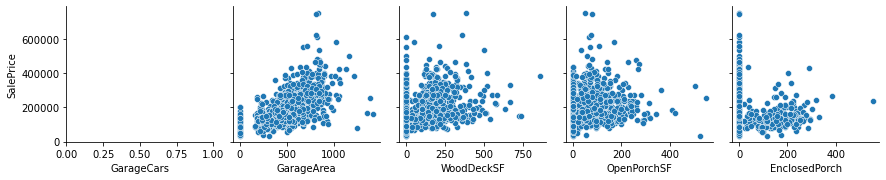

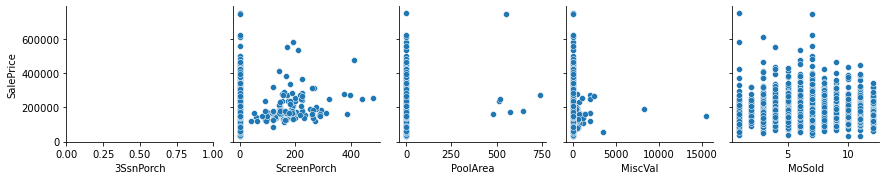

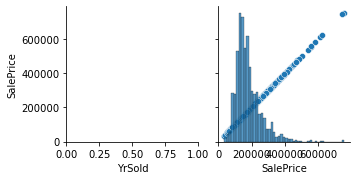

In [15]:
#We will use scatter plots to find further clues
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])
#Most of them seems to have a linear relationship with the SalePrice

In [16]:
#Compare all columns to saleprice but only getting rid of specific nans for 
#every independent column.

import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'SalePrice']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

   KitchenAbvGr: -0.13920069217785566
       HalfBath: -0.08439171127179887
     MSSubClass: -0.08428413512659523
    OverallCond: -0.0778558940486776
         YrSold: -0.028922585168730426
   BsmtHalfBath: -0.028834567185481712
       PoolArea: -0.014091521506356928
   BsmtFullBath: 0.011439163340408634
         MoSold: 0.04643224522381936
      3SsnPorch: 0.06393243256889079
    OpenPorchSF: 0.08645298857147708
        MiscVal: 0.08896338917298924
     Fireplaces: 0.1216605842136395
      BsmtUnfSF: 0.16926100049514192
   BedroomAbvGr: 0.18093669310849045
     WoodDeckSF: 0.19370601237520677
     BsmtFinSF2: 0.19895609430836586
  EnclosedPorch: 0.2412788363011751
    ScreenPorch: 0.25543007954878405
        LotArea: 0.2638433538714063
   LowQualFinSF: 0.3000750165550133
    LotFrontage: 0.35179909657067854
     MasVnrArea: 0.4340902197568926
     BsmtFinSF1: 0.4716904265235731
    GarageYrBlt: 0.48636167748786213
   YearRemodAdd: 0.5071009671113867
      YearBuilt: 0.5228973328794967

In [17]:
#strong corelation without nan values
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))
#nothing notable other than strong correlation with sales price

There is 11 strongly correlated values with SalePrice:
['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'GrLivArea', 'OverallQual']


In [18]:
quantitative_features_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
df_quantitative_values = df[quantitative_features_list]
df_quantitative_values.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,856,856,854,0,1710,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,920,920,866,0,1786,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,756,961,756,0,1717,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,0,0,250000


In [19]:
#correlation matchup with and without nan values
features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]
features_to_analyse.append('SalePrice')
features_to_analyse #data with most correlation

['TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

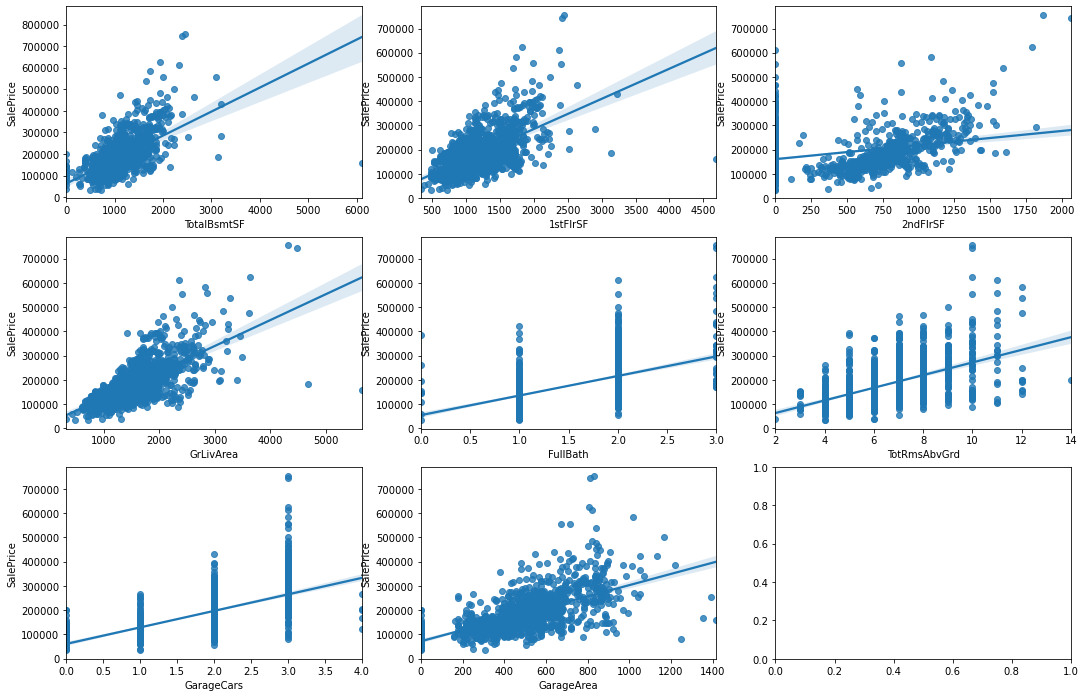

In [20]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='SalePrice', data=df[features_to_analyse], ax=ax)

#We can see that features such as TotalBsmtSF, 1stFlrSF, GrLivArea have a big spread but I 
#cannot tell what insights this information gives us

In [21]:
df_num1=df_num.copy()
df_num1.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [22]:
#hecking for NAN count
df_num1.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [23]:
#Replacing NAN values with Median 
for col in df_num1:
    df_num1[col] = df_num1[col].fillna(df_num1[col].median())

In [24]:
df_num1.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

## SCALE DATA

In [25]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

min_max_scaler.fit(df_num1)

MinMaxScaler()

In [26]:
df_num1.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [27]:
# get scaled data 
dataset_scaled = pd.DataFrame(min_max_scaler.transform(df_num1))

# assign column labels, Otherwise you will have index columnsrather than named ones
dataset_scaled.columns = df_num1.columns

In [28]:
dataset_scaled.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.217043,0.167341,0.043080,0.566591,0.571918,0.719332,0.581096,0.064448,0.078604,0.031580,...,0.109970,0.085302,0.039772,0.006712,0.031377,0.003738,0.002806,0.483811,0.453938,0.202779
std,0.248827,0.075437,0.046653,0.153666,0.139100,0.218862,0.344090,0.112957,0.080811,0.109443,...,0.146253,0.121126,0.110723,0.057711,0.116161,0.054441,0.032008,0.245784,0.332024,0.110321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.133562,0.029229,0.444444,0.500000,0.594203,0.283333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363636,0.250000,0.132030
50%,0.176471,0.164384,0.038227,0.555556,0.500000,0.731884,0.733333,0.000000,0.067948,0.000000,...,0.000000,0.045704,0.000000,0.000000,0.000000,0.000000,0.000000,0.454545,0.500000,0.177892
75%,0.294118,0.198630,0.048150,0.666667,0.625000,0.927536,0.900000,0.102656,0.126196,0.000000,...,0.196033,0.124314,0.000000,0.000000,0.000000,0.000000,0.000000,0.636364,0.750000,0.248715
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### PCA

In [29]:
# import PCA from decomposition
from sklearn.decomposition import PCA

# create the PCA object to use to fit the given data
pca = PCA()

# fit the PCA with the given cleaned-up data
pca.fit(dataset_scaled)

PCA()

In [30]:
# Principal axes in feature space, representing the directions of maximum variance in the data.
print(pca.components_)

[[ 3.94025515e-02  3.40848043e-02  1.07867939e-02 ...  2.67772380e-02
  -1.16889936e-02  1.72432882e-01]
 [-9.61985285e-02 -2.73026085e-03 -5.29104854e-03 ... -2.07310588e-01
   9.02331384e-01 -1.99949796e-02]
 [ 3.48796409e-01 -9.94664317e-03  2.93313736e-03 ... -7.82709616e-02
   3.37970943e-01  1.68393799e-02]
 ...
 [ 6.46884981e-03  1.99413589e-02 -9.39778652e-02 ... -4.32131909e-04
  -1.02973959e-04  1.41135956e-02]
 [ 2.48632086e-17 -2.12641213e-16  2.98097160e-16 ...  1.79135612e-16
   4.63171283e-17  3.59352933e-16]
 [-0.00000000e+00 -3.04062072e-17  2.66384377e-16 ...  8.36428741e-17
   1.09328779e-17  2.76721266e-16]]


In [31]:
# check the shape 
print(pca.components_.shape)

(37, 37)


In [32]:
# check the type 
print(type(pca.components_))

<class 'numpy.ndarray'>


In [33]:
# Percentage of variance explained by each of the selected components
print(pca.explained_variance_)

[2.46817960e-01 1.15831953e-01 1.01680464e-01 7.68071058e-02
 5.91695592e-02 5.65080406e-02 5.00954043e-02 4.49423719e-02
 3.06985548e-02 2.46800908e-02 1.99794144e-02 1.92035846e-02
 1.54340660e-02 1.36260138e-02 1.28533282e-02 1.25890101e-02
 1.14954006e-02 1.11121901e-02 1.04320462e-02 8.88602165e-03
 8.68528885e-03 7.41172487e-03 6.46275958e-03 5.66851515e-03
 4.71438326e-03 3.62363240e-03 3.45266354e-03 3.24557645e-03
 2.69283025e-03 2.55993832e-03 2.25509435e-03 1.94240864e-03
 1.59015390e-03 1.31213457e-03 9.85750456e-04 4.86762598e-32
 1.40876112e-33]


In [34]:
print(len(pca.explained_variance_))

37


In [35]:
print(pca.singular_values_)

[1.89764961e+01 1.29999546e+01 1.21799752e+01 1.05859136e+01
 9.29130706e+00 9.07993564e+00 8.54922189e+00 8.09758734e+00
 6.69247274e+00 6.00068766e+00 5.39907081e+00 5.29320601e+00
 4.74534533e+00 4.45873907e+00 4.33047410e+00 4.28571648e+00
 4.09533753e+00 4.02649790e+00 3.90132739e+00 3.60065349e+00
 3.55975230e+00 3.28842007e+00 3.07069475e+00 2.87582399e+00
 2.62264850e+00 2.29932157e+00 2.24442334e+00 2.17607354e+00
 1.98213000e+00 1.93260188e+00 1.81388607e+00 1.68344118e+00
 1.52316596e+00 1.38362001e+00 1.19925390e+00 8.42725715e-15
 1.43366052e-15]


In [36]:
print(pca.mean_)

[0.21704271 0.16734143 0.04308036 0.56659056 0.57191781 0.71933194
 0.58109589 0.0644482  0.07860378 0.03158027 0.24282552 0.17306538
 0.19013922 0.16803509 0.01021769 0.22258171 0.14178082 0.02876712
 0.5216895  0.19143836 0.35830479 0.34885845 0.37648402 0.2043379
 0.71444583 0.44178082 0.3335544  0.10997027 0.08530215 0.03977194
 0.00671179 0.031377   0.00373835 0.00280574 0.48381071 0.45393836
 0.20277905]


In [37]:
print(pca.noise_variance_)

0.0


In [38]:
principal_components = pca.fit_transform(dataset_scaled)

print(type(principal_components))
print(principal_components.shape)

principal_components_df = pd.DataFrame(principal_components)

<class 'numpy.ndarray'>
(1460, 37)


<AxesSubplot:>

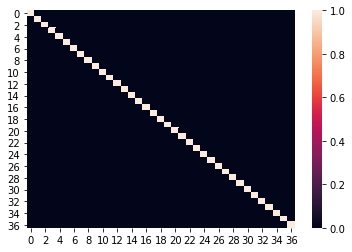

In [39]:
import seaborn as sns

sns.heatmap(principal_components_df.corr())

## Choosing the Number of Principal Components

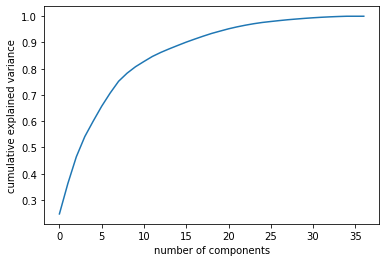

In [40]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#takes about 15 n components to reach 90% variance

## PCA for Dimensionality Reduction

In [41]:
pca_low_dim = PCA(n_components = 3)

In [42]:
pca_low_dim.fit(dataset_scaled)

PCA(n_components=3)

In [43]:
# original components
print(dataset_scaled.shape)

# transformed components
print(pca_low_dim.transform(dataset_scaled).shape)

(1460, 37)
(1460, 3)


In [44]:
print(pca_low_dim.explained_variance_)

[0.24681796 0.11583195 0.10168046]


In [45]:
print(pca_low_dim.explained_variance_.sum())

0.46433037725218906


## LINEAR REGRESSION

In [115]:
#seperating dependent data vs independent

x = df_num1.drop(['SalePrice'], axis = 1) #independent
y = df_num1['SalePrice'] #dependent

print('size of the array', df_num1.shape)

size of the array (1460, 37)


In [116]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [117]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(x_train,y_train)

LinearRegression(normalize=True)

In [118]:
print('Dimension of train_x dataframe:',x_train.shape)
print('Dimension of train_y dataframe:',y_train.shape)
print('Dimension of test_x dataframe:',x_test.shape)
print('Dimension of test_y dataframe:',y_test.shape)

Dimension of train_x dataframe: (1022, 36)
Dimension of train_y dataframe: (1022,)
Dimension of test_x dataframe: (438, 36)
Dimension of test_y dataframe: (438,)


In [119]:
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression()
ln_reg.fit(x_train, y_train)

LinearRegression()

In [120]:
ln_reg.coef_

array([-2.26324186e+02, -1.19558761e+02,  4.40442297e-01,  1.84318435e+04,
        3.24869668e+03,  2.56266416e+02,  1.74250009e+02,  2.15323229e+01,
        8.22453277e+00, -3.31338590e+00, -1.45927953e+00,  3.45186733e+00,
        1.04831193e+01,  1.21332539e+01,  9.37082624e+00,  3.19871994e+01,
        1.22445053e+04, -3.38304380e+02,  3.96663765e+03, -1.92655678e+03,
       -9.29837515e+03, -8.25377761e+03,  5.38715469e+03,  5.27963890e+03,
        1.23246065e+02,  1.53382882e+04, -1.01169870e+01,  1.95075118e+01,
       -1.93802296e+01,  2.89905353e+00,  4.68490221e+01,  7.11224523e+01,
       -1.04240538e+01, -2.27304597e+00,  2.90248592e+01, -1.78794969e+02])

In [121]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

df_pred = ln_reg.predict(x_test)
print('Mean Absolute Error of linear regression:',mean_absolute_error(df_pred, y_test))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, y_test))
print('R_Squared Score of linear regression:', r2_score(df_pred, y_test))

Mean Absolute Error of linear regression: 23130.419057208543
Mean Square Error of linear regression: 1242362471.1524453
R_Squared Score of linear regression: 0.7510873641355498


In [122]:
#final prediction on test data
predic_test = ln_reg.predict(df_num1.drop(['SalePrice'], axis=1))

In [126]:
#final prediction on test data
predic_test = ln_reg.predict(x)

In [127]:
#Create Sample Submission file 
submission_data = pd.DataFrame({'Pred_SalePrice':predic_test})
submission_data
val_y = pd.DataFrame(y_test)
val_y['Predicted'] = submission_data['Pred_SalePrice']

val_y

,SalePrice,Predicted
892,154500,151179.780203
1105,325000,308738.357709
413,115000,114624.604394
522,159000,180963.840915
1036,315500,299288.091282
...,...,...
331,139000,131975.495822
323,126175,105161.925082
650,205950,207835.625985
439,110000,150806.941391


Text(0, 0.5, 'Predicted Y')

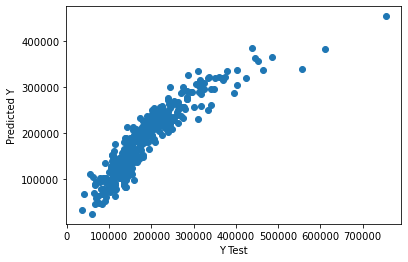

In [128]:
plt.scatter(val_y['SalePrice'],val_y['Predicted'])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [129]:
#Check precision, recall, f1-score
print( classification_report(y_test, predic_test) )

#Check ROC_AUC
auc = roc_auc_score(y_test, ln_reg.predict_proba(x_test)[:,1])
print('---------------------------------------------')
print('ROC_AUC is {} and accuracy rate is {}'.format(auc, model.score(x_test, y_test)))

ValueError: Found input variables with inconsistent numbers of samples: [438, 1460]

In [111]:
#seperating dependent data vs independent

x = df_num1[['TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea',
 'SalePrice']] #independent
y = df_num1['SalePrice'] #dependent

print('size of the array', df_num1.shape)

size of the array (1460, 37)


In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(x_train,y_train)

print('Dimension of train_x dataframe:',x_train.shape)
print('Dimension of train_y dataframe:',y_train.shape)
print('Dimension of test_x dataframe:',x_test.shape)
print('Dimension of test_y dataframe:',y_test.shape)

Dimension of train_x dataframe: (1022, 9)
Dimension of train_y dataframe: (1022,)
Dimension of test_x dataframe: (438, 9)
Dimension of test_y dataframe: (438,)


In [113]:
ln_reg = LinearRegression()
ln_reg.fit(x_train, y_train)

#final prediction on test data
predic_test = ln_reg.predict(x_test)

#Create Sample Submission file 
submission_data = pd.DataFrame({'Pred_SalePrice':predic_test})
submission_data
val_y = pd.DataFrame(y_test)
val_y['Predicted'] = submission_data['Pred_SalePrice']

val_y

,SalePrice,Predicted
892,154500,NaN
1105,325000,NaN
413,115000,274900.0
522,159000,NaN
1036,315500,NaN
...,...,...
331,139000,165000.0
323,126175,98000.0
650,205950,NaN
439,110000,NaN


In [114]:
#Check precision, recall, f1-score
print( classification_report(y_test, df_pred) )

#Check ROC_AUC
auc = roc_auc_score(y_test, ln_reg.predict_proba(x_test)[:,1])
print('---------------------------------------------')
print('ROC_AUC is {} and accuracy rate is {}'.format(auc, model.score(x_test, y_test)))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [104]:
#final prediction on test data
predic_test = ln_reg.predict(x_test)

#Create Sample Submission file 
submission_data = pd.DataFrame({'Pred_SalePrice':predic_test})
submission_data
val_y = pd.DataFrame(y_test)

print(val_y.shape)
print(x_test.shape)

(438, 1)
(438, 36)


In [105]:
val_y['Predicted'] = submission_data['Pred_SalePrice']

val_y

,SalePrice,Predicted
892,154500,NaN
1105,325000,NaN
413,115000,291640.173565
522,159000,NaN
1036,315500,NaN
...,...,...
331,139000,151904.673087
323,126175,95349.253932
650,205950,NaN
439,110000,NaN


In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score

In [108]:
#Check precision, recall, f1-score
print( classification_report(y_test, df_pred) )

#Check ROC_AUC
auc = roc_auc_score(y_test, ln_reg.predict_proba(x_test)[:,1])
print('---------------------------------------------')
print('ROC_AUC is {} and accuracy rate is {}'.format(auc, model.score(x_test, y_test)))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets